---

**Load essential libraries**

---

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(precision = 2, suppress = True)
import sys
from scipy import linalg

import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from scipy.sparse import random
from scipy import stats

---

Mount Google Drive folder if running Google Colab

---

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/BDA_1_Sem/APS/APS_Lab'
    DATA_DIR = DIR+'/Data/'
else:
   DATA_DIR = 'Data/'

Mounted at /content/drive


---

Load ICU data

---

In [ ]:
## Load data
FILE = DATA_DIR + 'ICU_Complete.csv'
dfICU = pd.read_csv(FILE)
dfICU.head()

,Length_of_stay,In-hospital_death,Age,Gender,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight,MechVent
0,8,No,76,Male,175.3,67,105,88.0,35.2,34,344,164,7.4,80.6,Yes
1,6,Yes,78,Female,162.6,50,132,111.0,38.0,30,128,91,16.1,48.4,Yes
2,8,No,74,Male,175.3,51,106,67.0,34.8,42,486,141,9.0,66.1,Yes
3,7,No,71,Female,157.5,60,132,84.0,35.5,35,245,120,13.7,55.8,Yes
4,11,No,78,Male,167.6,57,90,73.0,34.7,40,281,121,12.5,72.4,Yes


---

Create a list of categorical and continuous features

---

In [ ]:
## Create a list of categorical and continuous features
categorical_features = ['In-hospital_death', 'Gender', 'MechVent']
continuous_features = dfICU.columns[~dfICU.columns.isin(categorical_features)].to_list()
dfICU.dtypes

,0
Length_of_stay,int64
In-hospital_death,object
Age,int64
Gender,object
Height,float64
DiasABP_first,int64
Glucose_first,int64
HR_first,float64
Temp_first,float64
PaCO2_first,int64


---

Convert categorical features to the categorical type

---

In [ ]:
dfICU[categorical_features] = dfICU[categorical_features].astype('category')
dfICU.dtypes

,0
Length_of_stay,int64
In-hospital_death,category
Age,int64
Gender,category
Height,float64
DiasABP_first,int64
Glucose_first,int64
HR_first,float64
Temp_first,float64
PaCO2_first,int64


---

$\color{yellow}{\textbf{Complete this}}$

Principal component analysis (PCA) of the dataset using the continuous features. For that, extract the dataframe comprising the continuous features.

---

In [ ]:
## Extract dataframe comprising the continuous features
dfICU_continuous = dfICU[continuous_features]
dfICU_continuous.head(10)

,Length_of_stay,Age,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight
0,8,76,175.3,67,105,88.0,35.2,34,344,164,7.4,80.6
1,6,78,162.6,50,132,111.0,38.0,30,128,91,16.1,48.4
2,8,74,175.3,51,106,67.0,34.8,42,486,141,9.0,66.1
3,7,71,157.5,60,132,84.0,35.5,35,245,120,13.7,55.8
4,11,78,167.6,57,90,73.0,34.7,40,281,121,12.5,72.4
5,5,40,165.1,58,114,79.0,35.7,86,368,209,13.0,90.7
6,7,58,188.0,65,213,119.0,36.8,46,328,244,22.2,106.0
7,20,46,152.4,71,163,80.0,36.4,48,168,505,22.1,88.6
8,16,66,167.6,58,270,84.0,37.6,34,155,124,9.1,80.0
9,14,78,170.2,57,127,95.0,35.0,47,415,90,2.2,61.3


---

$\color{yellow}{\textbf{Complete this}}$

Make a scatter plot between heart rate and Temperature

---

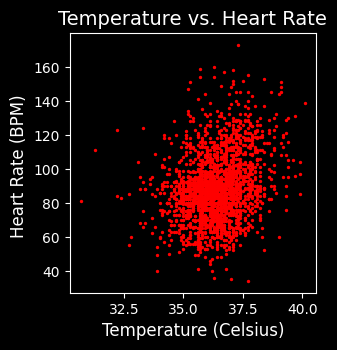

In [ ]:
## Scatter plot between heart rate and temperature
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.scatter(dfICU['Temp_first'],dfICU['HR_first'], s = 2.0, color = 'red')
ax.set_xlabel('Temperature (Celsius)', fontsize = 12)
ax.set_ylabel('Heart Rate (BPM) ', fontsize = 12)
ax.set_title('Temperature vs. Heart Rate', fontsize = 14);

---

$\color{yellow}{\textbf{Complete this}}$

Calculate the variance of heart rates from scratch and using the in-built function in numpy


---

In [ ]:
## Variance of heart rates
print(np.mean((dfICU_continuous['HR_first']-np.mean(dfICU['HR_first']))**2))
print(np.var(dfICU_continuous['HR_first']))

342.51247099682314
342.5124709968232


---

$\color{yellow}{\textbf{Complete this}}$

Calculate the variance of temperatures from scratch and using the in-built function in numpy


---

(dfICU_continuous['Temp_first']-np.mean(dfICU['Temp_first'])) Mean Centered Heart Rates  or the Devaitions Vector

In [ ]:
## Variance of temperatures
print(np.mean((dfICU_continuous['Temp_first']-np.mean(dfICU['Temp_first']))**2))
print(np.var(dfICU_continuous['Temp_first']))

1.0801301886129595
1.0801301886129542


---

$\color{yellow}{\textbf{Complete this}}$

Calculate the covariance between heart rate and temperature from scratch and using the in-built function in numpy


---

In [ ]:
## Covariance between heart rate and Temperature pressur
print((1/dfICU_continuous.shape[0])*np.dot(dfICU_continuous['HR_first']-np.mean(dfICU['HR_first']), dfICU['Temp_first']-np.mean(dfICU['HR_first'])))
print(np.cov(dfICU['HR_first'], dfICU['Temp_first']))

4.877566400265129
[[342.66   4.88]
 [  4.88   1.08]]


Pandas Function to get the Covariance

In [ ]:
dfICU_continuous.cov()

,Length_of_stay,Age,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight
Length_of_stay,153.936008,-6.201823,71.290939,2.610087,49.351137,39.179199,1.332034,4.787547,-241.459950,108.166537,4.219668,10.448673
Age,-6.201823,230.297910,-48.171826,-50.652783,-8.029360,-62.911491,-2.316354,-13.071127,135.129203,-120.732783,-1.701991,-71.401302
Height,71.290939,-48.171826,51849.921412,-34.889924,-170.419463,156.232106,1.652919,65.270375,27.522955,718.329363,3.564866,-30.799575
DiasABP_first,2.610087,-50.652783,-34.889924,185.309867,49.737607,27.463404,0.630055,1.051941,-119.016816,59.142776,-2.168542,22.027053
Glucose_first,49.351137,-8.029360,-170.419463,49.737607,4318.428666,101.083783,-0.680573,-4.202128,-1050.639171,729.676861,33.302257,77.295408
HR_first,39.179199,-62.911491,156.232106,27.463404,101.083783,342.657542,4.879632,14.051670,-414.607899,202.338402,23.237792,9.637841
Temp_first,1.332034,-2.316354,1.652919,0.630055,-0.680573,4.879632,1.080588,0.198962,-30.565465,17.129746,0.301192,1.224160
PaCO2_first,4.787547,-13.071127,65.270375,1.051941,-4.202128,14.051670,0.198962,91.937787,-157.914142,58.979511,1.784427,45.759591
PaO2_first,-241.459950,135.129203,27.522955,-119.016816,-1050.639171,-414.607899,-30.565465,-157.914142,16525.781849,-3131.793137,-99.816469,-218.279855
Platelets_first,108.166537,-120.732783,718.329363,59.142776,729.676861,202.338402,17.129746,58.979511,-3131.793137,10901.539692,244.247997,-20.851430


---

$\color{yellow}{\textbf{Complete this}}$

Calculate the correlation between heart rate and Temperature using the in-built function in numpy


---

This will give a number between -1 and 1 it will help in eliminating units of the variables (Make the variables/ Features Indepented

In [ ]:
## Correlation between heart rate and temperature using the in-built function in numpy
print(np.corrcoef(dfICU['HR_first'], dfICU['Temp_first']))

[[1.   0.25]
 [0.25 1.  ]]


---

$\color{yellow}{\textbf{Complete this}}$

Create a matrix comprising the standardized values of the continuous features


---

In [ ]:
## Standardized continuous features
sc = StandardScaler()
X = sc.fit_transform(dfICU_continuous)
print(X)

[[-0.54  0.68  0.   ... -0.29 -0.81 -0.27]
 [-0.7   0.81 -0.05 ... -0.99  0.41 -1.65]
 [-0.54  0.55  0.   ... -0.51 -0.59 -0.89]
 ...
 [-0.7   0.81  0.03 ... -0.87  0.95  0.08]
 [-0.38  1.6   0.01 ...  1.32  1.99  0.  ]
 [ 0.35  0.29 -0.1  ...  0.32  0.22 -0.38]]


---

$\color{yellow}{\textbf{Complete this}}$

Perform PCA with one component and rank the features in terms of the magnitude of the PCA loadings

---

In [ ]:
## Create and fit PCA object
pca = PCA(n_components = 1)
print(pca.fit_transform(X))

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-1.57]
 [ 0.07]
 [-2.81]
 ...
 [-0.37]
 [ 1.1 ]
 [-0.15]]
[[-0.35  0.04  0.22  0.18  0.42  0.36  0.21 -0.4   0.38  0.3   0.22]]
[1.95]


Exculding the Length of stay column

In [ ]:
#df = dfICU_continuous[~dfICU_continuous['Length_of_stay']]
dfICU_continuous_Final = dfICU_continuous.drop('Length_of_stay', axis = 1)
sc = StandardScaler()
X = sc.fit_transform(dfICU_continuous_Final)
print(X)

[[ 0.68  0.    0.43 ... -0.29 -0.81 -0.27]
 [ 0.81 -0.05 -0.82 ... -0.99  0.41 -1.65]
 [ 0.55  0.   -0.75 ... -0.51 -0.59 -0.89]
 ...
 [ 0.81  0.03 -0.23 ... -0.87  0.95  0.08]
 [ 1.6   0.01 -0.82 ...  1.32  1.99  0.  ]
 [ 0.29 -0.1  -0.01 ...  0.32  0.22 -0.38]]


In [ ]:
## Create and fit PCA object
pca = PCA(n_components = 1)
print(pca.fit_transform(X))

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-1.57]
 [ 0.07]
 [-2.81]
 ...
 [-0.37]
 [ 1.1 ]
 [-0.15]]
[[-0.35  0.04  0.22  0.18  0.42  0.36  0.21 -0.4   0.38  0.3   0.22]]
[1.95]


---

$\color{yellow}{\textbf{Complete this}}$

Project the 0th sample onto the PC-1 direction

---

In [ ]:
## Project the 0th sample onto the PC-1 direction
np.dot(X[0], pca.components_[0])

-1.5670488680947763

---

$\color{yellow}{\textbf{Complete this}}$

Calculate the variance of the samples projected onto the PC-1 direction

---

In [ ]:
## Calculate the variance of the samples projected onto the PC-1 direction
np.var(pca.fit_transform(X))

1.9464946276425357

---

$\color{yellow}{\textbf{Complete this}}$

Perform PCA with two components

---

In [ ]:
# Create and fit PCA object
pca = PCA(n_components=2)
print(pca.fit_transform(X))

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-1.57 -0.26]
 [ 0.07  1.49]
 [-2.81  0.03]
 ...
 [-0.37  0.37]
 [ 1.1   2.89]
 [-0.15  0.9 ]]
[[-0.35  0.04  0.22  0.18  0.42  0.36  0.21 -0.4   0.38  0.3   0.22]
 [ 0.46  0.01 -0.37  0.16 -0.02  0.01 -0.23 -0.15  0.43  0.44 -0.41]]
[1.95 1.32]


---

$\color{yellow}{\textbf{Complete this}}$

Calculate the proportion of variance explained by projecting on to
PC-1 and onto both PC-1 and PC-2 directions

---

In [ ]:
## Calculate the proportion of variance explained by projecting on to
## PC-1 and onto both PC-1 and PC-2 directions\
print(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_)

[0.18 0.12]


array([1.95, 3.26])

In [ ]:
np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)

array([0.6, 1. ])

---

$\color{yellow}{\textbf{Complete this}}$

Perform PCA with all components and select the number of PCs such that we are able to explain at least 75% of the total variance in the data

---

In [ ]:
pca = PCA(n_components = 11)
print(pca.fit_transform(X))

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-1.57 -0.26 -0.53 ...  0.41 -0.01  0.92]
 [ 0.07  1.49 -1.98 ...  0.84 -0.11 -0.73]
 [-2.81  0.03  0.43 ... -0.83  0.09  0.07]
 ...
 [-0.37  0.37 -0.62 ...  1.06  0.79  0.02]
 [ 1.1   2.89  0.03 ...  1.37  0.07  0.22]
 [-0.15  0.9  -0.71 ...  0.39 -0.24 -0.64]]
[[-0.35  0.04  0.22  0.18  0.42  0.36  0.21 -0.4   0.38  0.3   0.22]
 [ 0.46  0.01 -0.37  0.16 -0.02  0.01 -0.23 -0.15  0.43  0.44 -0.41]
 [ 0.17  0.04 -0.32  0.09 -0.29 -0.33  0.61 -0.06  0.09  0.19  0.5 ]
 [-0.06 -0.46  0.39  0.61 -0.15 -0.39 -0.23  0.06  0.07  0.11  0.09]
 [-0.15  0.8   0.23  0.11  0.03 -0.34 -0.1   0.3   0.12  0.21 -0.04]
 [ 0.23  0.35 -0.06  0.59  0.    0.13  0.07 -0.39 -0.21 -0.5  -0.08]
 [-0.07 -0.06 -0.47  0.32  0.54  0.05 -0.12  0.37 -0.38  0.2   0.19]
 [ 0.11 -0.14  0.18 -0.03  0.43 -0.35  0.56  0.   -0.13  0.02 -0.54]
 [ 0.47  0.08  0.32 -0.24  0.2  -0.14 -0.24 -0.38 -0.43  0.31  0.3 ]
 [ 0.49  0.01  0.37  0.13 -0.05  0.51  0.24  0.52  0.06  0.06  0.09]
 [ 0.28 -0.05 -0.01 -0.13  0.45 -0.27 -0.16  0

In [ ]:
## Perform PCA with all components and select the number of PCs such that
## we are able to explain at least 75% of the total variance in the data
pca = PCA(n_components = 0.75)
print(pca.fit_transform(X))

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-1.57 -0.26 -0.53 ...  0.43 -0.25 -0.24]
 [ 0.07  1.49 -1.98 ... -0.99  0.71  0.96]
 [-2.81  0.03  0.43 ...  0.57 -0.65  0.03]
 ...
 [-0.37  0.37 -0.62 ...  0.13 -0.79  1.52]
 [ 1.1   2.89  0.03 ... -0.46 -0.49 -0.05]
 [-0.15  0.9  -0.71 ... -0.64 -0.05 -1.25]]
[[-0.35  0.04  0.22  0.18  0.42  0.36  0.21 -0.4   0.38  0.3   0.22]
 [ 0.46  0.01 -0.37  0.16 -0.02  0.01 -0.23 -0.15  0.43  0.44 -0.41]
 [ 0.17  0.04 -0.32  0.09 -0.29 -0.33  0.61 -0.06  0.09  0.19  0.5 ]
 [-0.06 -0.46  0.39  0.61 -0.15 -0.39 -0.23  0.06  0.07  0.11  0.09]
 [-0.15  0.8   0.23  0.11  0.03 -0.34 -0.1   0.3   0.12  0.21 -0.04]
 [ 0.23  0.35 -0.06  0.59  0.    0.13  0.07 -0.39 -0.21 -0.5  -0.08]
 [-0.07 -0.06 -0.47  0.32  0.54  0.05 -0.12  0.37 -0.38  0.2   0.19]]
[1.95 1.32 1.12 1.05 1.   0.96 0.87]


In [ ]:
np.cumsum(pca.explained_variance_)

array([ 1.95,  3.26,  4.39,  5.44,  6.44,  7.4 ,  8.27,  9.08,  9.79,
       10.46, 11.  ])

In [ ]:
np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)

array([0.18, 0.3 , 0.4 , 0.49, 0.59, 0.67, 0.75, 0.83, 0.89, 0.95, 1.  ])

---

$\color{yellow}{\textbf{Complete this}}$


Fit a PCA model for the dataset considering only two features: (1) Heart Rate (2) Temperature

---

In [ ]:
## Fit a PCA model for the dataset considering only two features:
## (1) Heart Rate (2) Temperature


In [ ]:
## Scatter plot of heart rate and temperature along with the PC vectors
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.scatter(?, ?, s = 4.0, alpha = 0.2, color = 'red')
arrowprops = dict(arrowstyle = '->', linewidth = 2, shrinkA = 0, shrinkB = 0)
ax.annotate('', xy = (pca.components_[0, 0], pca.components_[1, 0]), xytext = (0, 0), arrowprops = arrowprops)
ax.annotate('', xy = (pca.components_[0, 1], pca.components_[1, 1]), xytext = (0, 0), arrowprops = arrowprops)